# Implementation of a GH Filter

## This is an implementation of a GH Filter. I am following an example created by Roger Labbe in his textbook "Kalman and Bayesian Filters in Python" https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python. My objective for this notebook is to implement the g-h filter that Labbe created, but on a different data set. Then I will explain the context / meaning of the filter.

[-0.85227924  0.04769936  0.60577058 -0.10824455  0.13151626 -0.1641634
  0.28913921 -0.32890759  0.04559936  0.06062473  0.61827183  0.6918024
  1.06059311  1.34005658  0.60820744  0.34215618  0.65005868  0.81603146
  0.16734303  0.19896987 -0.69282985  0.79277306  0.28589106 -0.04423144
  0.44740675  0.38495397 -0.193581   -0.55064312  0.22071821  0.28783343
  0.30227292  0.12358669  0.48984804  0.16452869  1.09324189  0.91959962
  0.58033259  0.31890806  0.64203546  0.81971749  0.83391667  0.1611701
 -0.86458948 -0.73355831  0.42658119 -0.18311933  0.63681849 -0.01062586
 -0.05875622  0.7357621   0.83460261  0.06477889  0.94961546  0.32120047
 -0.2105097   0.56957817  0.58947468  0.61898025 -0.16793779 -0.12690975]
           date      vals
0    2016-01-01  0.706711
1    2016-01-02 -0.279008
2    2016-01-03  0.759976
3    2016-01-04  0.444262
4    2016-01-05  0.397376
...         ...       ...
1822 2020-12-27  1.193342
1823 2020-12-28  0.440572
1824 2020-12-29  0.482665
1825 2020-12

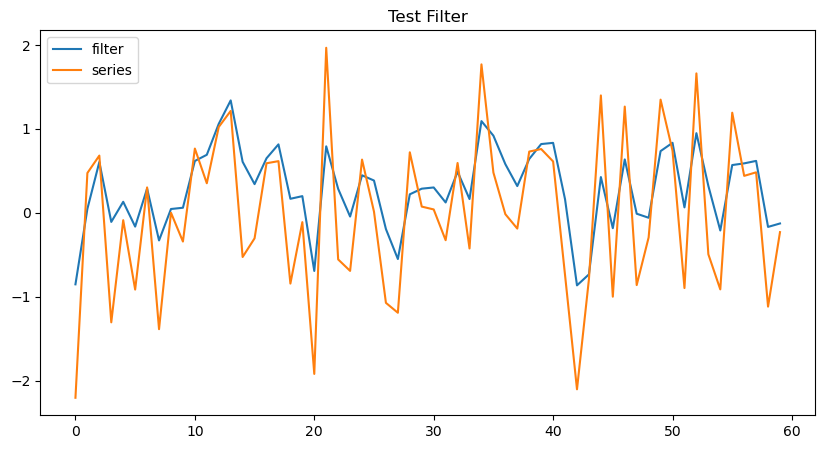

In [28]:
# Necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating the data for filtration
# Following https://www.alpharithms.com/generating-artificial-time-series-data-with-pandas-in-python-272321/

# Generate series from start of 2016 to end of 2020
dates = pd.date_range(start='2016-01-01', end='2020-12-31', freq='D')
# Add a column of random integers to each date entry
series = pd.DataFrame(dates, columns =['date']) 
series['vals'] = np.random.normal(0,1, size=len(series))

seriesshort = series.vals.iloc[-60:].values
# This is the code for the g-h filter
def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)

fdata = g_h_filter(data=seriesshort, x0=0., dx=.5, g=.5, h=.01, dt=1.)
plt.figure(figsize=(10, 5))
plt.plot(fdata)
plt.plot(seriesshort)
plt.title('Test Filter')
plt.legend(['filter','series'],loc='upper left')
print(fdata)
print(series)

## Explanation
### Data Generating Process
#### I used pandas date_range function to generate a dataset from the beginning of 2016 to the end of 2020. The increments of the dataset were days. Then a random variable to be filtered was created. We created a process generated by the standard normal random variable. 

### G-H Filter
#### I then attempted to apply a filter to the random process to generate estimates for the position of the random process using a G-H filter. The key mechanics of this general G-H filter utilize the prediction, the residual and the estimate. First, we receive our first reading (estimate) of the underlying process and make a prediction for the next period. We then take the next reading of the dataset and take the difference between this reading and our prediction to generate what our estimate of the underlying process for the period. We then repeat this cycle to improve our predictions. What makes this filter useful is our pre-selected parameters G and H. G defines how our filter learns based upon the difference of our prediction to the actual data, and h captures the sensitivity of our filter to the change of the underlying process.